What return would a random investment strategy generate?

In [1]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_2019_price_data():
    filename = "./Data/stock_prices_2019.xlsx"
    df = pd.read_excel(filename, index_col='Date')
    return df

In [3]:
dfPrice = get_2019_price_data()

In [9]:
def get_loc_matrix(sampleSize, xMax, yMax):
    """
    xMax -> # of days in sample data
    yMax -> # of stocks
    generate maxtrix of values => [[0:sampleSize, a=0:xMax, a:yMax]]
    """
    stock = np.random.randint(0, yMax, size=sampleSize)
    p1Loc = np.random.randint(0, xMax-1, size=sampleSize)
    f = lambda x: np.random.randint(x+1, xMax)
    p2Loc = np.array(list(map(f, p1Loc)))
    return np.array((stock, p1Loc, p2Loc)).T


In [10]:
def get_price_matrix_random(p, loc):
    p1 = p[loc[:, 1], loc[:, 0]]
    p2 = p[loc[:, 2], loc[:, 0]]
#     return np.array((p1, p2)).T
    return (p2/p1-1)*100

In [11]:
p = np.array(dfPrice)
loc = get_loc_matrix(100_000, p.shape[0], p.shape[1])
random_r = get_price_matrix_random(p, loc)
random_r = random_r[~np.isnan(random_r)]

In [12]:
def print_stats(r):
    r = np.array(r)
    r = r[~np.isnan(r)]
    for i in ['mean', 'median', 'std', 'min', 'max']:
        print(f'{i}: {getattr(np, i)(r): 9.4f}')

In [13]:
print_stats(random_r)

mean:   -0.6700
median:   -0.1265
std:   39.0248
min:  -99.9660
max:  4576.1905


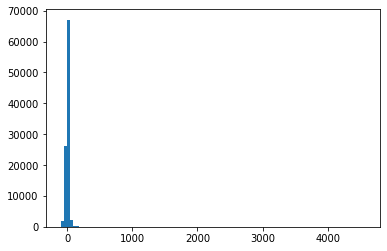

In [14]:
plt.hist(random_r, bins=100)
plt.show()

In [15]:
# remove lowest and highest 1% of range
lBound = np.percentile(random_r, 1)
uBound = np.percentile(random_r, 99)
random_r = random_r[random_r >= lBound]
random_r = random_r[random_r <= uBound]

In [16]:
len(random_r)

96101

In [17]:
print_stats(random_r)

mean:   -1.4625
median:   -0.1265
std:   17.3109
min:  -65.5172
max:   69.2308


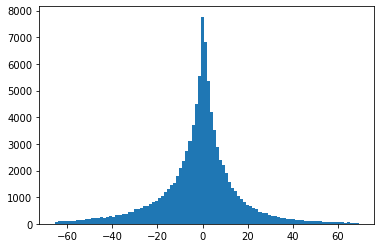

In [18]:
plt.hist(random_r, bins=100)
plt.show()

In [21]:
random_r

array([-0.44943779, -6.70956331, 14.8632857 , ..., 46.65437721,
        0.7809417 , -0.37510532])

In [29]:
np.random.shuffle(random_r)
random_r

array([ 28.63534907, -23.00000191,   3.12420517, ...,  10.41059811,
         7.24929881,  -2.11920954])

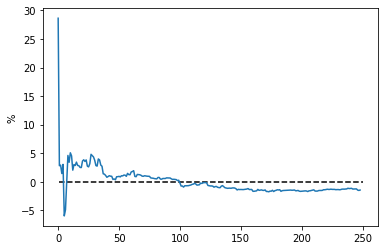

In [37]:
mean_arr = [np.mean(random_r[:i]) for i in range(1, 250)]
plt.plot(mean_arr)
plt.ylabel("%")
plt.hlines(0, 1, 250, linestyles='dashed')
plt.show()